In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Contour
    Contour는 등고선이라는 뜻으로 같은 값을 가진 곳을 연결한 선이라고 생각하면 된다. 이미지에서 Contours는 동일한 색 또는 동일한 강도를 가지고 있는 영역의 경계선을 연결한 선이다. 물체의 모형 분석이나 객체 감지 및 인식 알고리즘에 주로 사용하는 툴이다.
    
    - 정확도를 높이기 위해 주로 Binary 이미지를 사용한다. 그래서 Contours를 찾기 전에 threshold나 Canny 경계선 탐지 등을 이미지에 먼저 적용한다.
    - cv2.drawContours() 함수는 원본 이미지를 직접 수정하기 때문에, 원본 이미지를 보존하려면 copy() 함수를 사용해야 한다.
    - openCV에서 Contours를 찾는 것은 검정색 배경에서 하얀색 대상을 찾는 것과 비슷하므로 찾고자 하는 대상은 흰색, 배경은 검은색으로 하는 것이 좋다.

## cv2.findContours(image, mode, method [, contours [, hierarchy [, offset]]]) → contours, hierarchy
    openCV에서 suzuki85 알고리즘을 사용해 이미지에서 Contours를 찾는 함수

    1. image : 8bit 싱글 채널 이미지(8UC1)를 입력으로 받아 0이 아닌 픽셀들은 1로, 0인 픽셀들은 0으로 만들어 마치 이미지가 바이너리 이미지인 것처럼 다룬다. 그래서 compare, InRange, threshold, adaptiveThreshold, Canny 등의 함수나 또 다른 방법을 사용해서 GrayScale이나 단색을 가진 바이너리 이미지로 만들어야 한다. 만약 mode가 RETR_CCOMP, RETR_FLOODFILL 이라면 입력 이미지로 32비트 싱글 채널 이미지(32SC1)도 사용할 수 있다.
    
    ★★ mode : Contour 추출 알고리즘으로 2번째 리턴값, hierarchy의 값에 영향을 준다.
    1. RETR_EXTERNAL : 이미지의 가장 바깥쪽 Contour만 추출
    2. RETR_LIST : 모든 Contour를 찾지만 계층구조 상간관계(hierarchy)를 고려하지 않음
    3. RETR_CCOMP : 모든 Contour를 찾고 2단계의 계층구조로 구성한다. 1단계 계층에서는 외곽 경계부분을, 2단계 계층에서는 구멍의 경계부분을 나타내는 부분을 contour로 구성한다. 만약 연결된 구성 요소의 구멍 안에 또 다른 Contour이 있다면 그것은 1단계 계층으로 생각한다.
    4. RETR_TREE : 모든 Contour를 찾고 모든 계층관계를 추출한다.
    5. RETR_FLOODFILL
    cv::RetrievalModes 참고

    ★★ method : Contour 근사 알고리즘
    1. CHAIN_APPROX_NONE : Contours를 구성하는 점들을 저장한다. 
    2. CHAIN_APPROX_SIMPLE : Contours의 수평, 수직, 대각선 방향의 모든 점들을 버리고 끝점만 남겨둔다. 예를들어 똑바로 세워진 직사각형인 경우 4개의 모서리점만 남기고 다 버린다. (즉, Contours Line을 그릴 수 있는 point만 저장한다.)
    3. CHAIN_APPROX_TC89_L1 : Teh - Chin 연결 근사 알고리즘 1.1 버전을 적용
    4. CHAIN_APPROX_TC89_KCOS : Teh - Chin 연결 근사 알고리즘 KCOS 버전을 적용
    (Pattern Analysis and Machine Intelligence, IEEE Transactions on, 11(8):859–872, 1989)
    cv::ContourApproximationModes 참고
    
    4. contours : 검출된 Contour. 각각의 Contour는 Contour를 구성하는 점들로 이루어진 포인트 벡터 형태(파이썬에서는 배열의 리스트 형태)로 저장되며, 원소의 갯수는 Contour의 갯수와 같다.
    5. hierarchy : 이미지 형상(image topology)에 대한 정보가 포함되어 있는 출력 벡터로 Contours들 간의 관계를 나타내는 값이다. Contours * 4 만큼의 갯수 만큼 요소를 가지고 있다. i번째 Contour에 대해서
        - hierarchy[i][0] : 동일한 계층 구조에서 다음 Contour에 대한 인덱스
        - hierarchy[i][1] : 동일한 계층 구조에서 이전 Contour에 대한 인덱스
        - hierarchy[i][2] : 자식 Contour의 인덱스
        - hierarchy[i][3] : 부모 Contour의 인덱스
    여기서 각각의 요소에 해당하는 인덱스가 존재하지 않으면 -1이 지정된다.

## cv2.drawContours(image, contours, contourIdx, color [, thickness [, lineType [, hierarchy [, maxLevel [, offset]]]]]) → image
    Contours의 윤곽선을 그린다. thickness가 0이상이면 Contour의 윤곽선을 그리고 음수이면 Contours로 둘러쌓인 영역을 채운다. Contours의 윤곽선이나 빈 공간을 채우는 것은 원본 이미지에 그대로 저장된다.
    
    1. image : 입력 이미지
    2. contours : 입력받은 모든 Contours들. 해당 Contours는 cv2.findContours 함수를 통해 찾을 수 있으며, 각각의 Contour는 포인트 벡터 형태로 저장된다.
    3. contourIdx : 그릴 Contour를 나타내는 파라미터. 이 값이 음수이면 모든 Contours들을 그린다.
    4. color : Contours의 색 (Color 타입은 BGR을 따른다)
    5. thickness : Contours 윤곽선의 두께. 이 값이 음수이면(혹은 FILLED) 그려진 Contours의 내부를 채운다.
    6. hierarchy : hierarchy에 대한 추가적인 정보를 제공해주는 파라미터로 특정 Contours들만 그리고 싶을 때 사용할 수 있다.
    7. maxLevel : 그려진 Contours들의 최고 단계를 지정한다.
        0이면 특정 Contour만 그릴 수 있다.
        1이면 Contours와 중첩된 Contours들을 그린다.
        2이면 Contours, 중첩된 Contours 그리고 이것에도 중첩된 Contours 등등을 그린다.
        이 파라미터는 hierarchy 파라미터를 사용할 수 있을 때 고려되어진다.
    8. offset : 추가적으로 Contour를 이동시키는 파라미터이다. 그려진 Contours는 offset = (dx, dy)에 따라 이동한다.

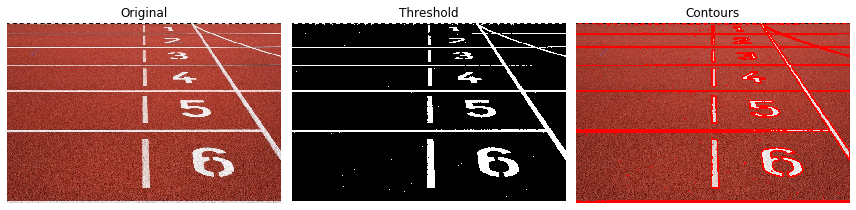

In [3]:
img = cv2.imread('athletic-field-1867053_1920.jpg')
imgcopy = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

contours1, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours1, -1, (0, 0, 255), 2)

cv2.imshow('threshold', thr)
cv2.imshow('contours', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

b, g, r = cv2.split(imgcopy)
imgcopy = cv2.merge([r, g, b])
b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])

titles = ['Original', 'Threshold', 'Contours']
images = [imgcopy, thr, img]

plt.figure(figsize=(12, 12))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

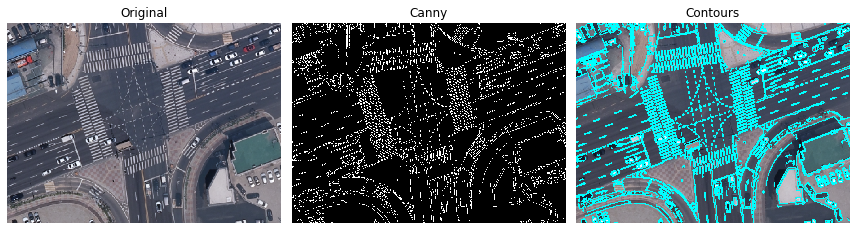

In [4]:
img2 = cv2.imread('Screenshot 2020-08-06 at 15.43.35.png')
img2copy = img2.copy()
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(img2, 127, 255)

contours2, _ = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2, contours2, -1, (255, 255, 0), 2)

cv2.imshow('canny', canny)
cv2.imshow('contour', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

b, g, r = cv2.split(img2copy)
img2copy = cv2.merge([r, g, b])
b, g, r = cv2.split(img2)
img2 = cv2.merge([r, g, b])

titles = ['Original', 'Canny', 'Contours']
images = [img2copy, canny, img2]

plt.figure(figsize=(12, 12))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

# Video Contours Detection (with Canny algorithm)

In [5]:
def onChange(x):
    pass

def contours():
    try:
        print("비디오 재생")
        cap = cv2.VideoCapture('video_edge_detection.mp4')
        cap2 = cv2.VideoCapture('video_edge_detection.mp4')
        
        cv2.namedWindow('Contours')
        cv2.createTrackbar('Low threshold', 'Contours', 0, 255, onChange)
        cv2.createTrackbar('High threshold', 'Contours', 0, 255, onChange)
    except:
        print("비디오 재생 실패")
        return
    
    while True:
        ret, frame = cap.read()
        ret, frame2 = cap2.read()
        
        if ret:
            k = cv2.waitKey(0)
            if k == 27:
                break
                
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            low = cv2.getTrackbarPos('Low threshold', 'Contours')
            high = cv2.getTrackbarPos('High threshold', 'Contours')
            
            if low > high:
                print("Low threshold must be low than high threshold")
            
            elif (low==0) and (high == 0):
                cv2.imshow('Contours', frame)
                cv2.imshow('Original', frame2)
                
            else:
                canny = cv2.Canny(frame_gray, low, high)
                contours, _ = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
                cv2.drawContours(frame, contours, -1, (0, 255, 255), 2)
                cv2.imshow('Contours', frame)
                cv2.imshow('Original', frame2)
            
        else:
            print("비디오 종료")
            break
    
    cap.release()
    cap2.release()
    cv2.destroyAllWindows()

In [6]:
contours()

비디오 재생
비디오 종료


# CHAIN_APPROX_SIMPLE vs CHAIN_APPROX_NONE
    앞서 cv2.findContours에서 Contours 근사 알고리즘으로 소개되었던 cv2.CHAIN_APPROX_SIMPLE과 cv2.CHAIN_APPROX_NONE에 대해 가볍게 소개해보려고 한다.
    
    만약 어떤 직선 이미지에서 Contours를 찾는다고 할 때 이 직선상의 모든 점들을 다 알아야 할 필요는 없다. 직선의 양 끝점 2개만 알고 있으면 되는 것이다. cv2.CHAIN_APPROX_SIMPLE는 Contour의 수평, 수직, 대각선 방향의 직선상에 놓인 점들은 모두 버리고 해당 직선들의 끝 점들만 취한다. cv2.CHAIN_APPROX_NONE은 직선상에 놓인 점들을 포함한 모든 점들을 취하는 방식이다. 이 두 방식의 차이는 컴퓨터 메모리를 얼마나 잡아 먹고 쓰느냐와 관련이 있고, 이는 결국 성능 문제로 귀결된다.
    
    두 방식을 비교하기 위해 얻어진 각각의 방식으로 얻어진 Contour를 이미지 위에 작은 노란색 원으로 그려보았다. 그린 결과 확실히 SIMPLE 알고리즘으로 얻어진 Contour의 갯수가 적은 것을 알 수 있다.

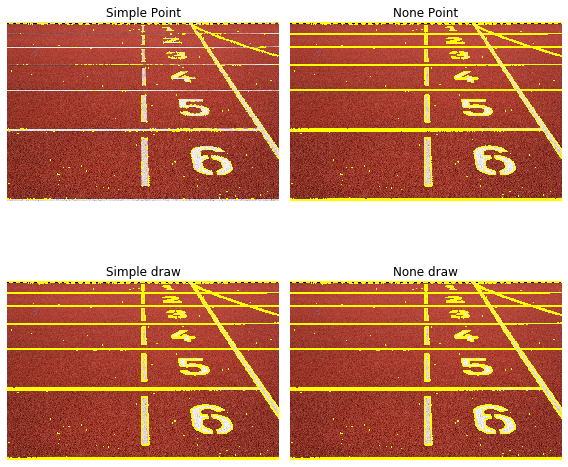

In [10]:
img = cv2.imread('athletic-field-1867053_1920.jpg')
simple_ = img.copy()
simple = img.copy()
none_ = img.copy()
none = img.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thr = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)

contours_simple, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_none, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours_simple)):
    for j in range(len(contours_simple[i])):
        cv2.circle(simple_, (contours_simple[i][j][0][0], contours_simple[i][j][0][1]), 1, (0, 255, 255), -1)

for i in range(len(contours_none)):
    for j in range(len(contours_none[i])):
        cv2.circle(none_, (contours_none[i][j][0][0], contours_none[i][j][0][1]), 1, (0, 255, 255), -1)
        
cv2.drawContours(simple, contours_simple, -1, (0, 255, 255), 2)
cv2.drawContours(none, contours_none, -1, (0, 255, 255), 2)

cv2.imshow('Simple', simple)
cv2.imshow('Simple Point', simple_)
cv2.imshow('None', none)
cv2.imshow('None Point', none_)
cv2.waitKey(0)
cv2.destroyAllWindows()

titles = ['Simple Point', 'None Point', 'Simple draw', 'None draw']
images = [simple_, none_, simple, none]

plt.figure(figsize=(8, 8))
for i in range(4):
    b, g, r = cv2.split(images[i])
    images[i] = cv2.merge([r, g, b])
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()